In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, SGDRegressor
sns.set()

In [2]:
data = pd.read_csv('Folds5x2_pp.csv')

In [3]:
data = data.apply(pd.to_numeric, errors='coerce')

In [4]:
data = data.dropna()

In [5]:
X = np.array(data[ ['AT', 'V']])

In [6]:
y = np.array(data['PE'])

In [7]:
def return_beta(X, y):
    ''' fit y = X \beta + \beta_0.\ '''
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_
    #return beta

### Calculate Bootstrap Betas

In [8]:
beta_array = []

for _ in range(500):
    idx = np.random.choice(np.arange(X.shape[0]), 100, False);
    beta_array.append( return_beta(X[idx], y[idx]))

In [9]:
beta_array = np.array(beta_array)

In [14]:
#beta_array[:, 0]

### 4(a) Look at distribution of marginals

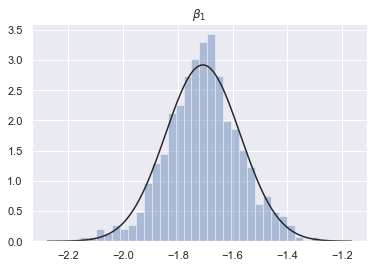

In [10]:
sns.distplot(beta_array[:, 0], bins = 30, kde=False, fit=stats.norm)
plt.title(r'$\beta_1$')
plt.savefig('marginal_beta_1.pdf',bbox_inches='tight' )

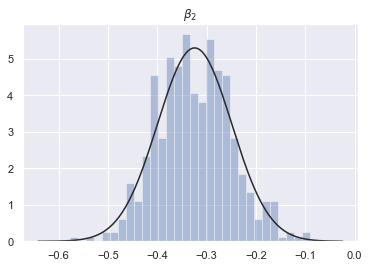

In [11]:
sns.distplot(beta_array[:, 1], bins = 30, kde=False, fit=stats.norm)
plt.title(r'$\beta_2$')
plt.savefig('marginal_beta_2.pdf',bbox_inches='tight' )

In [12]:
beta_mean = beta_array.flatten().mean() ## empricial mean of all betas from boostrap

### 4(b) Principal Directions

In [ ]:
beta_u = #matrix with principal directions of beta cloud as columns
x_u = #matrix with principal directions of the X as columns

In [ ]:
scaling = 0.15 ## a variable to make adjust the length of the arrows

In [ ]:
plt.scatter(beta_array[:, 0], beta_array[:, 1])

plt.plot(beta_mean[0], beta_mean[1], '*', color='black')

### plot principle direction of the covariance matrix of X
plt.arrow(beta_mean[0], beta_mean[1], scaling*x_u[1, 0], scaling*x_u[1, 1], head_width=0.02, 
         head_length=0.03, fc='red', ec='red',length_includes_head=True,lw=2)
plt.arrow(-1.703, -0.326,  scaling*x_u[0, 0], scaling*x_u[0, 1], head_width=0.02, 
         head_length=0.03, fc='red', ec='red',length_includes_head=True,lw=2)


### plot principle direction of the covariance matrix of betas
plt.arrow(beta_mean[0], beta_mean[1],  scaling*beta_u[0, 0], scaling*beta_u[0, 1], head_width=0.02, 
         head_length=0.03, fc='purple', ec='purple',length_includes_head=True,lw=2)
plt.arrow(beta_mean[0], beta_mean[1], scaling*beta_u[1, 0], scaling*beta_u[1, 1], head_width=0.02, 
         head_length=0.03, fc='purple', ec='purple',length_includes_head=True,lw=2)

plt.plot()

plt.savefig('scatter_plot.pdf',bbox_inches='tight' )

4(c) Do the principal directions of $X$ datapoints and $\beta^k$ datapoints align? Give a condition on the data generation process under which these principal directions will align. 
